# Lesson 2: Implementing and Interpreting AUCROC for Logistic Regression Models

Here's the markdown version of the content:

---

# Implementing and Interpreting AUCROC for Logistic Regression Models

## Introduction and Goal

Greetings! Today, we explore the Area Under the Receiver Operating Characteristic (AUCROC), an essential classification model and evaluation metric.

Using Python, we will develop the AUCROC metric from scratch. First, we will grasp the concept of the Receiver Operating Characteristic (ROC) curve. Then, we will plot the ROC curve and calculate the area under it to derive the AUCROC metric. The final step will be the interpretation of this metric.

## Understanding Receiver Operating Characteristic (ROC) Curve

Our first step is comprehending the ROC curve, a pivotal diagnostic tool for assessing binary classifiers. It graphically illustrates the performance of a classification model at all classification thresholds by plotting the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** on the Y-axis and X-axis, respectively.

- The **True Positive Rate (TPR)**, sometimes called sensitivity, measures the proportion of actual positives (`truth_labels == 1`) the model correctly identifies. In other words, it's a measure of the ability of the classifier to detect true positives.
  
- The **False Positive Rate (FPR)** is the proportion of actual negatives (`truth_labels == 0`) that are incorrectly identified as positives by our model. It's the situation where the model falsely triggers a positive result.

## Plotting ROC Curve

Next, we will demonstrate the ROC curve using Python. We will work with a small, randomly generated dataset, in which we will create truth values and predicted labels. We will calculate and record TPR and FPR for classification thresholds [0, 0.1, 0.2, 0.3, ..., 0.9, 1].

```python
from matplotlib import pyplot as plt
from numpy import random

truth_labels = [1 if random.rand() > 0.6 else 0 for _ in range(500)]
# we generate some random predictions that would normally be obtained from the model
# If a predicted probability is higher than the threshold, it is considered to be a positive outcome 
predicted_probs = [max(0, min(1, random.normal(loc=label, scale=0.3))) for label in truth_labels]

def roc_curve(truth_labels, predicted_probs):
    thresholds = [0.1 * i for i in range(11)]
    tprs, fprs = [], []
    for threshold in thresholds:
        tp = fp = tn = fn = 0  # initialize confusion matrix counts
        # for each prediction
        for i in range(len(truth_labels)):
            # calculate confusion matrix counts
            if predicted_probs[i] >= threshold:
                if truth_labels[i] == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if truth_labels[i] == 1:
                    fn += 1
                else:
                    tn += 1
        # track the TPR and FPR for this threshold
        tprs.append(tp / (tp + fn))  # True Positive Rate (TPR)
        fprs.append(fp / (tn + fp))  # False Positive Rate (FPR)
    return tprs, fprs


tprs, fprs = roc_curve(truth_labels, predicted_probs)
plt.plot(fprs, tprs, marker='.')
plt.show()
```

Here is the result:

*Insert the ROC Curve Image Here*

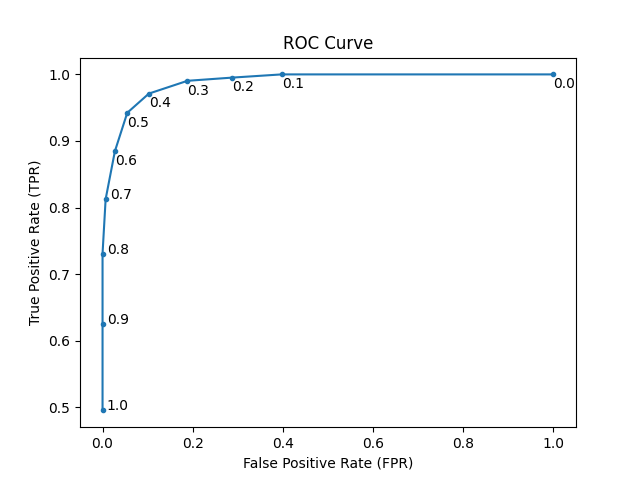


You can see a float value annotating each point. It is the prediction threshold that this point corresponds to.

## Deep Dive into Receiver Operating Characteristic (ROC) Curve

The ROC curve is a graphical representation showing the performance of a classification model. But how do we interpret this plot?

In the ROC curve, each point corresponds to a pair of TPR and FPR values calculated at a specific threshold and paints a picture of the trade-off between true positives (hits) and false positives (false alarms).

- A perfect classifier would have a point at the top left of the plot, indicating a high TPR and low FPR regardless of the threshold. This point represents the desirable scenario where the model correctly classifies all positive cases without raising false alarms.
  
- A less skillful classifier exhibits a curve closer to the diagonal line (called a line of no-discrimination), which means the model does no better than a random guess.

So, when analyzing the ROC curve, the further away it is from the diagonal line to the top left corner, the better the model's classification ability.

## Understanding and Implementing Area Under ROC (AUCROC)

Then, we will move to the AUCROC curve, encapsulating the model's overall performance in a single value. A high AUC symbolizes superior model performance.

Now for the math part: we will calculate the AUCROC using the **Trapezoidal rule**. This numerical integration technique calculates the area under the curve by summing up the areas of the trapezoids. Given the points \((x1, y1)\) and \((x2, y2)\) on the ROC curve, the area of the trapezoid formed is given by:

\[
0.5 \times |x2 - x1| \times (y1 + y2)
\]

```python
def compute_aucroc(tprs, fprs):
    aucroc = 0
    for i in range(1, len(tprs)):
        aucroc += 0.5 * abs(fprs[i] - fprs[i - 1]) * (tprs[i] + tprs[i - 1])
    return aucroc

aucroc = compute_aucroc(tprs, fprs)
print(f"The AUC-ROC value is: {aucroc}")  # The AUC-ROC value is: 0.9827272125066242
```

## Interpreting AUCROC

The AUCROC, as a single scalar value, indicates the probability that the classifier will rate a randomly chosen positive instance higher than a randomly chosen negative one. In simple words, it measures the classifier's discriminative power.

Despite the complexity behind this metric, the interpretation is relatively straightforward:

- An AUCROC close to 1 implies the model has a strong classification ability. It correctly ranks positive cases higher than negatives most of the time.
  
- An AUCROC close to 0.5 suggests that the model cannot classify cases correctly, comparable to a random guess.
  
- An AUCROC close to 0 might initially seem poor. However, this interesting situation indicates that the classifier consistently gives higher ranks to negative instances. If we reverse its predictions, we unexpectedly obtain a very successful model!

## Lesson Summary and Practice Announcement

Congratulations! We have successfully created the AUCROC for Logistic Regression from scratch. We unraveled the mystery of the ROC curve, depicted it, computed the AUCROC, and interpreted this metric. Now, brace yourself for hands-on exercises to reinforce your newfound knowledge.

---

## Evaluating the Diagnostic Test with AUC-ROC

## Fine-Tuning Thresholds for ROC Curve Analysis

## Diagnostic Test AUCROC Calculation Correction

## Calculating the AUC-ROC Metric

## Plotting the ROC curve